# Questions


#### 1 -What is a Multi-Layer Perceptron (MLP) and how does it differ from a single-layer perceptron?

#### 2- Explain the architecture of a Multi-Layer Perceptron (MLP) and the role of input, hidden, and output layers.


#### 3- How are weights initialized in a Multi-Layer Perceptron (MLP) and why is it important?

#### 4- What is the purpose of activation functions in a Multi-Layer Perceptron (MLP)? Name some commonly used activation functions.

#### 5- What is backpropagation and how is it used to train a Multi-Layer Perceptron (MLP)


#### 6- How do you choose the number of hidden layers and neurons in each layer of a Multi-Layer Perceptron (MLP)?




### 1) **Multi Layer perceptron(MLP):**
*  Multi Layer Preceptron is the one of deep learning method of Artificial Neural Network that is also inspired by structure of human brain.

* Multilayer preceptron the name itself describes it consists of multiple layers such as input layer, hidden layer and output layer.

* The difference between single layer perceptron and Multi layer perceptron is that when we given many input to single perceptron it cannot learn the input and train because it has only single perceptron, but with Multiple layer when we given Many No. of inputs it will under go training with input layer, hidden layer and output layer with randomly assigning weights with xnet and activation function calculate the loss with optimizer for better prediction.

### **2) Architecture of Multi Layer Perceptron:**

*There No. of inputs will go through the input layer with randomnly assigning weights by weight initializer, Every input connects with the each neurons of input layer is also know fully connected layer, for example in the first perceptron of input layer the input will be calculate with Sum(Xnet) and activation function it gives output.

* That output Will go to the hidden layer as input and weights is assigned randomly for first forward propagation go through sum(Xnet) and activation function gives output.

* The output from hidden layer will be the input of output layer and  weights is assigned randomly, go through sum(Xnet) and activation function gives the prediction we need to check with the actual and predicted check the loss and calculate the loss with optimizer.

3) At the First forward feed, the weights are initialized randomly, but there are some problems we face described below.
* Vanishing Gradient when the weight is assigned is too small at certain stage it will not able to reach the global minima.
* In case Gradient Explosion the when assigning weight too large it will go beyond the global minima, it cannot the reach the global minima.
* Lastly weight should not be equal when assigning new weights if it will stay same will not reach the global minima.

To avoid these problems we have some methods as weight initializer:

* Normal Initialization
* Uniform distribution
* Xavier/glorot Initialization
* He initialization.


4) The purpose of Activation function is that it will convert the weighted sum of input with bias and passed to the hidden layer as output.

There are some commonly used activation functions:
* Sigmoid
* Tanh
* Relu
* Leaky Relu
* Parameterized Relu
* Exponential Relu
* Swish
* Softmax.

5) Back propagation basically defines of calculating the loss of predicted output, we will assign new weights with old weights difference with the learning parameter with the  differentiation of loss with old weight. This process should be done from output layer to hidden layer, hidden layer to input layer. This will give better prediction with no loss.

6) The number of hidden layers and neurons is choosed based on the size of dataset if we have small dataset we choose 10-50. If we have big dataset we can choose from 100 to 1000.

# Load MNIST Dataset and build a Deep Learning Model.

### Things to be done:
    1- Load the MNIST Data
    2- Divide the data into train and test sets
    3- Plot the first 10 images using imshow()
    4- Convert images to categorical format
    5- Create a sequential model
    6- Plot the model summary
    7- Plot the architecture of the model with its layer shapes
    8- Compile the model
    9- Fit the model with 20 epochs (as per your desktop configuration)
    10- Plot Training and Testing Loss
    11- Save the model in .h5 extension
    12- Load the model
    13- Test the model

In [1]:
#Importing Necessary libraries
import matplotlib.pyplot as plt #Data Visualization
from keras.layers import Dense, Flatten # For creating the Neural Network Layers
from keras.models import Sequential # For creating a Sequential Model
from keras.utils import to_categorical # For converting the image labels to one-hot encoding values
from keras.datasets import mnist # Loading the MNIST dataset from keras
from keras import utils #For utility function

import warnings
warnings.filterwarnings('ignore')


In [2]:
#1) Importing the MNIST dataset
from keras.datasets import mnist

#2) Loading the dataset and dividing into training and testing set
(X_train,y_train),(X_test, y_test)=mnist.load_data()


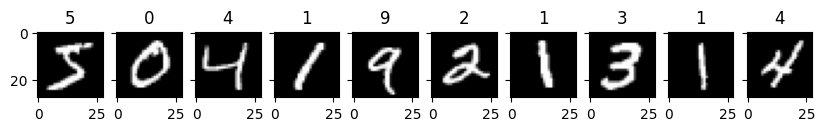

In [3]:
#3) Plotting first 10 images of the dataset
fig,axes = plt.subplots(ncols=10,sharex=False, sharey=True, figsize=(10,4))# First 10 col images is visualized, sharex subplot is not shared, sharey is shared
# Using for loop visualizing the first 10 images
for i in range(10):
  axes[i].set_title(y_train[i])#set the title of each images with ytrain labels
  axes[i].imshow(X_train[i],cmap='gray')#Show the images from X_train with the colormap as gray
plt.show()


In [4]:
# 4) Converting the labels to categorical using One-hot encoding
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Shape of the test data
print(y_test.shape)


(10000, 10)


In [6]:
# 5) Creating the sequential model
# Using Sequential model adding layers in the sequential format
model= Sequential()

# Use flatten layer to convert 28x28 input images to 1d array because MLP understands only 1d array
model.add(Flatten(input_shape=(28,28)))

#Use Dense layer with 10 neurons with sigmoid activation function
model.add(Dense(10, activation ='sigmoid'))

#Use Dense layer with 5 neurons with relu activation function
model.add(Dense(5, activation = 'relu'))

#Use Output layer as Dense with 10 neurons with softmax activation function
model.add(Dense(10, activation= 'softmax'))



In [7]:
# 6) Plot the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


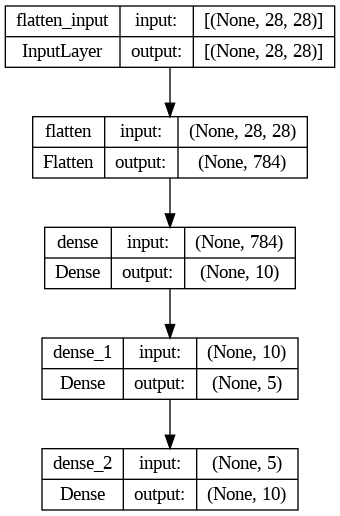

In [8]:
# 7) Plot the architecture and its layers shape
utils.plot_model(model, show_shapes=True)

In [9]:
# 8) Compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["acc"])
# Since it is a multi class data we use loss function as categorical cross entropy, optimizer as Adam, metrics as accuracy

In [10]:
#9) Fit the model with 20 epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3934 - acc: 0.5595 - val_loss: 0.9023 - val_acc: 0.7591
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8214 - acc: 0.7653 - val_loss: 0.7707 - val_acc: 0.7756
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7225 - acc: 0.7939 - val_loss: 0.6759 - val_acc: 0.8083
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7036 - acc: 0.7923 - val_loss: 0.6668 - val_acc: 0.8163
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6728 - acc: 0.8043 - val_loss: 0.6524 - val_acc: 0.8173
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6498 - acc: 0.8096 - val_loss: 0.6243 - val_acc: 0.8211
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6305 - acc: 0.8191 - val_loss: 0.5898 - val_acc: 0.8416
Epoch 8/20
1875/1875 [==============================] - 6s 3

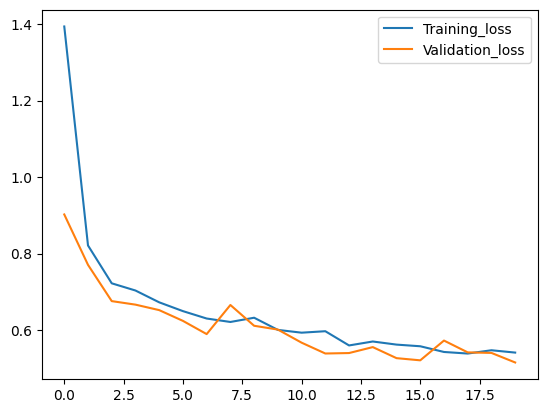

In [11]:
#10) Plotting the training and testing loss
plt.plot(history.history['loss'], label = 'Training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.legend()

In [12]:
# 11) Save the model with .h5 extension
model.save('mnist_model.h5')

In [13]:
# 12) Load the model
import tensorflow as tf
model = tf.keras.models.load_model("mnist_model.h5")

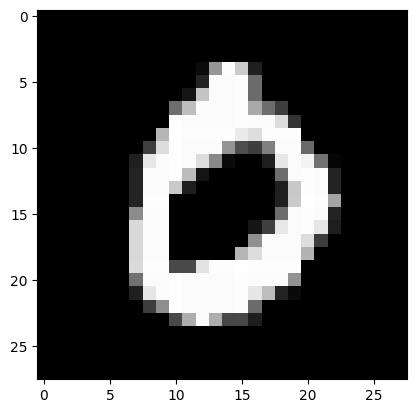

In [14]:
# 13) Test the model
plt.imshow(X_test[3],cmap='gray')


In [15]:
import numpy as np
X= np.reshape(X_test[3],(1,28,28))
# Use trained model to predict the label of the image
predicted_label = np.argmax(model.predict(X))
print(predicted_label)


1/1 [==============================] - 0s 80ms/step
0


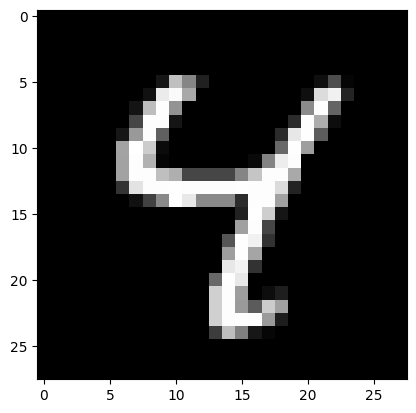

In [16]:
# Second test image
plt.imshow(X_test[6],cmap='gray')


In [17]:
import numpy as np
X= np.reshape(X_test[6],(1,28,28))
# Use trained model to predict the label of the image
predicted_label = np.argmax(model.predict(X))
print(predicted_label)

1/1 [==============================] - 0s 17ms/step
4


# Conclusion:
* We got accuracy around 84% with training set and 85% Testing set the loss is also reduced, from the observation it is not overfitted.

* We predicted and tested the model it performs better.

* We use Sigmoid activation for input layer and relu for hidden layer and softmax for the output layer since it is a multi class data.  